# Advanced Statistical Inference -- Bayesian inference for a coin tossing experiment


The beta probability density function is defined as:

$$
p(r \vert \alpha, \beta) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}r^{\alpha-1}(1-r)^{\beta-1} 
$$

where $0 \le r \le 1$ and $\alpha, \beta> 0$.
You can use the `plot_beta()` function.


In [33]:
from scipy.stats import beta
from scipy.special import gamma as gamma_func
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def plot_beta(a,b, plot=False):
    plt.figure(figsize=(15,5))
    x = np.linspace(0, 1, 1000)
    plt.plot(x, beta.pdf(x, a, b),'r')
    plt.title("beta pdf: alpha=" + str(a) + " beta=" + str(b))
    plt.show()

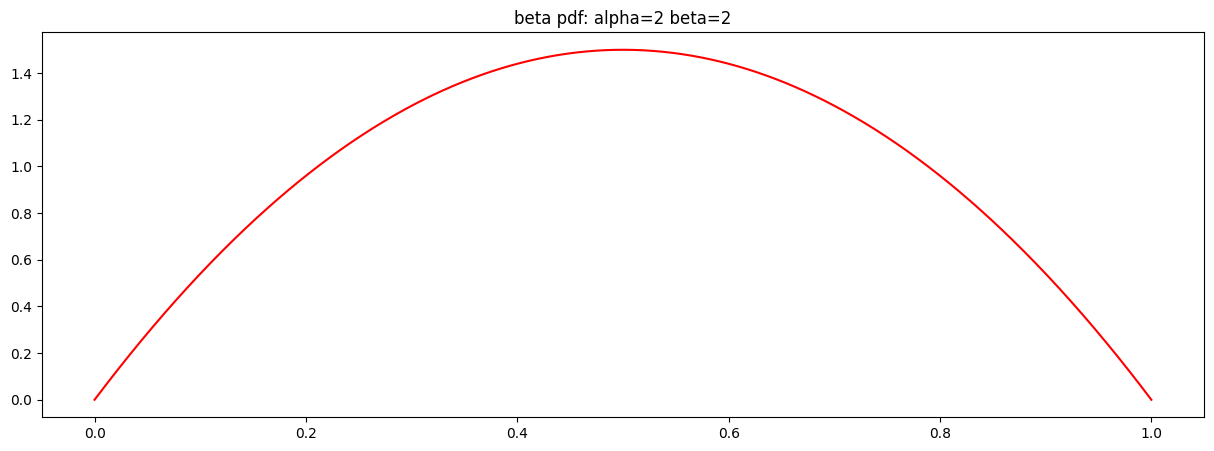

In [35]:
plot_beta(a=2, b=2)

**Exercise:**
$r$ is the probability of some hypothetical coin landing heads. The beta distribution is a suitable prior distribution for $r$. Choose 2 different pairs of values $\alpha$ and $\beta$ and plot the corresponding densities. For both cases, describe the possible beliefs they encode about the coin. Note, there is no ‘right’ answer here, just think about how likely different values of $r$ are in your densities and how this reflects on the coin.


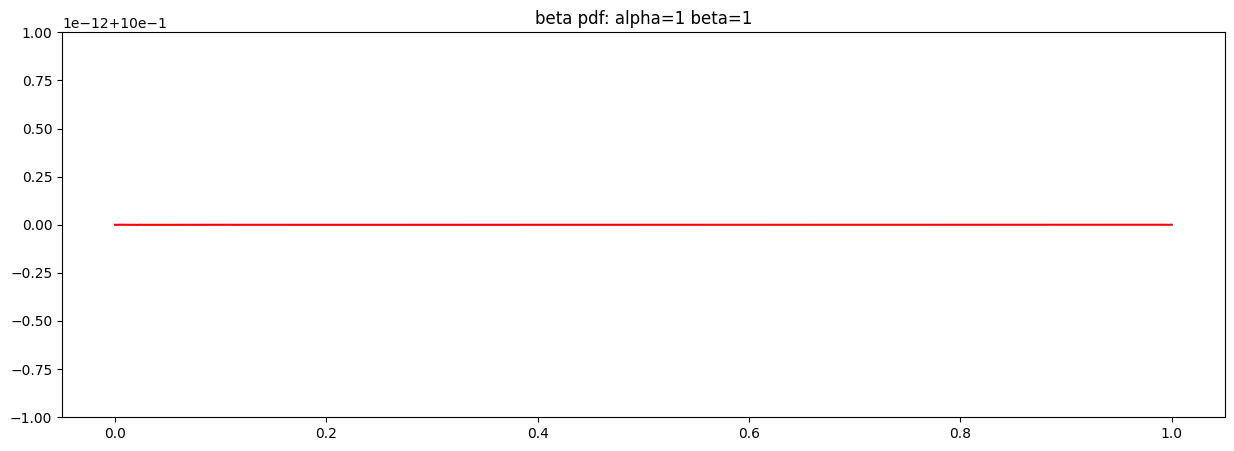

In [36]:
plot_beta(a=1, b=1)

Observe how the distribution changes for different values of 'a' and 'b', and comment on your results.


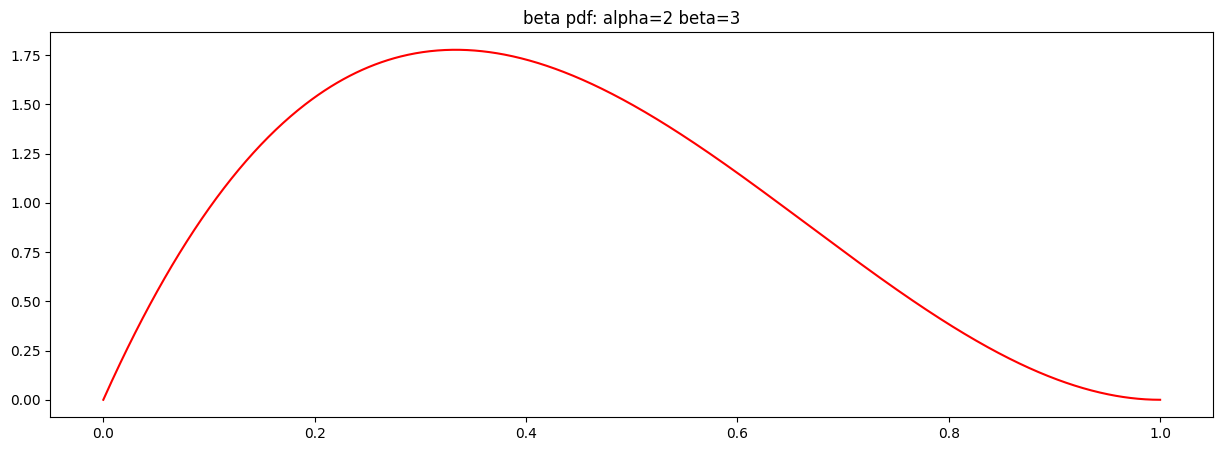

In [37]:
plot_beta( a=2, b=3 ) # TO COMPLETE

**Answer:** 
- For alpha=1 and beta=1 we can see that each value of r is equiprobable, which means that we don't know if the coin is most probable fair or unfair.
- For alpha=2 and beta=3 we can see that the most probable value of r is between 0.3 and 0.4, which means that we believe that the coin is more likely to be unfair than fair.

**Exercise:**
`coin1()` and `coin2()` are two ‘coins’ that you can use. In either case, calling the function with an argument N tosses the coin N times and returns the number of heads. Pick either one and using the equations we derived in the class, along with any choice for $\alpha$ and $\beta$, plot the posterior density for $r$ after $N = 1, 5, 10, 100$ tosses. Use `plot_beta()` to do the plotting. You can put them all on one plot or all on separate plots. Explain what you see.


In [38]:
def coin1(N):
    return sum(np.random.random(N)<=0.3)
def coin2(N):
    return sum(np.random.random(N)<=0.8)

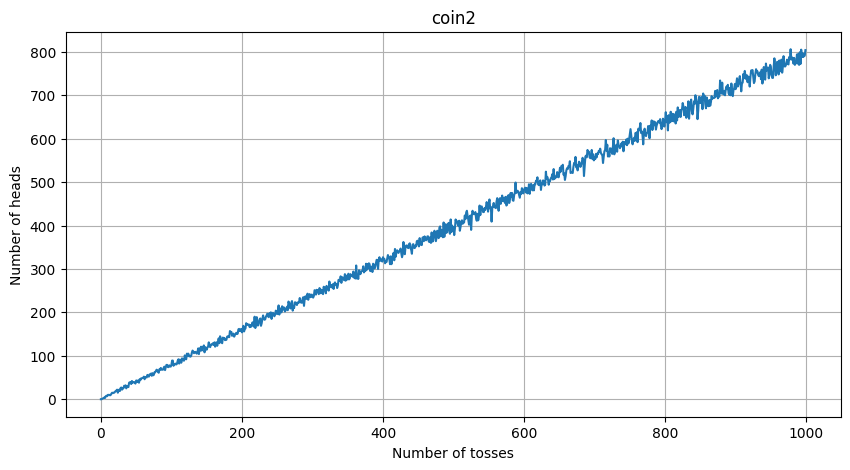

In [39]:
yN = [coin2(N) for N in range(1000)]
plt.figure(figsize=(10,5))
plt.plot(list(range(1000)), yN)
plt.xlabel("Number of tosses")
plt.ylabel("Number of heads")
plt.title("coin2")
plt.grid()
plt.show()

So, `coin2()` is biased to generate more heads (roughly 8 out of 10).

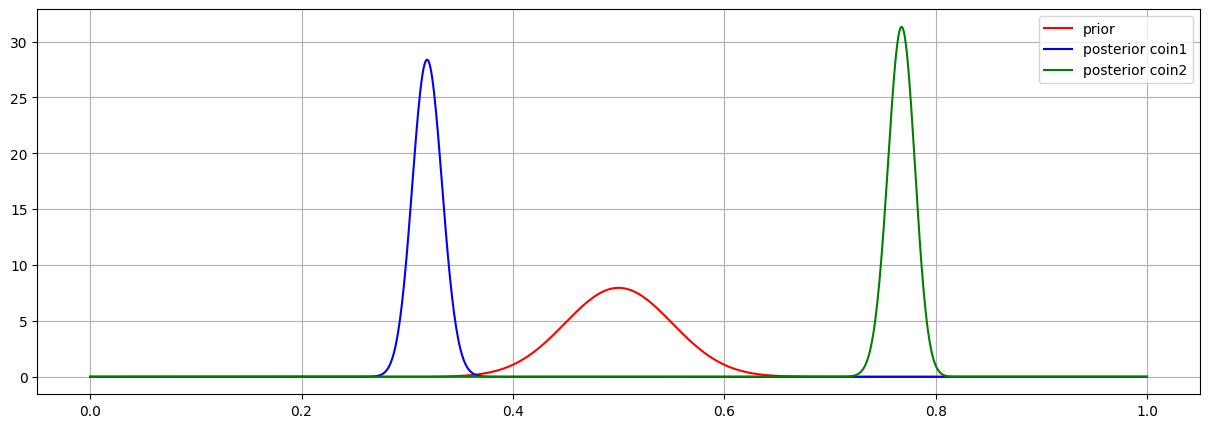

In [40]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are fair

alpha1 = 50
beta1 = 50

# Compute the posterior 'gamma' and 'delta' parameters
gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1 # TO COMPLETE
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2 # TO COMPLETE

plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

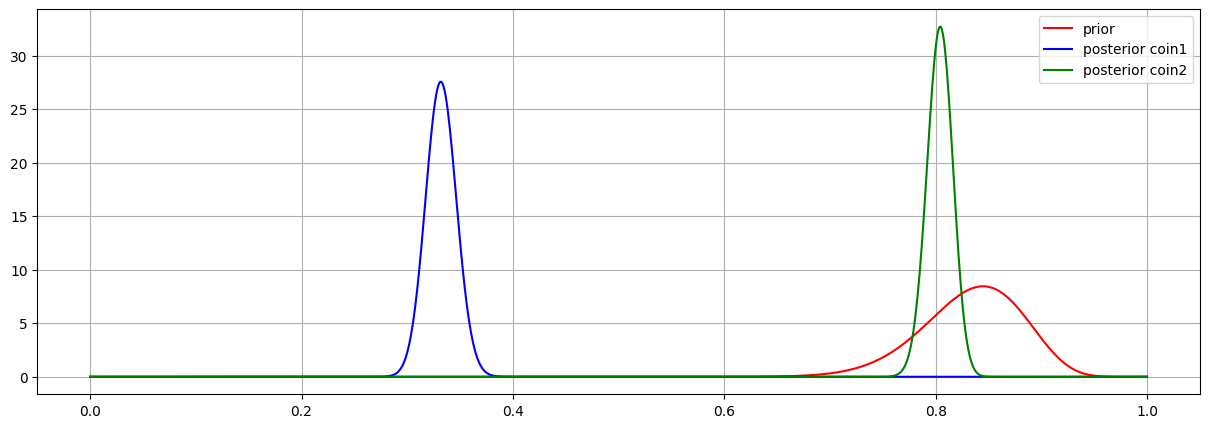

In [41]:
N = 1000

yN1, yN2 = coin1(N), coin2(N)

# Assume coins are biased

alpha1 = 50
beta1 = 10

# Compute the posterior 'gamma' and 'delta' parameters

gamma1, gamma2 = yN1 + alpha1, yN2 + alpha1 # TO COMPLETE
delta1, delta2 = beta1 + N - yN1, beta1 + N - yN2 # TO COMPLETE


plt.figure(figsize=(15,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha1, beta1),'r', label='prior')
plt.plot(x, beta.pdf(x, gamma1, delta1),'b', label='posterior coin1')
plt.plot(x, beta.pdf(x, gamma2, delta2),'g', label='posterior coin2')
plt.legend()
plt.grid()
plt.show()

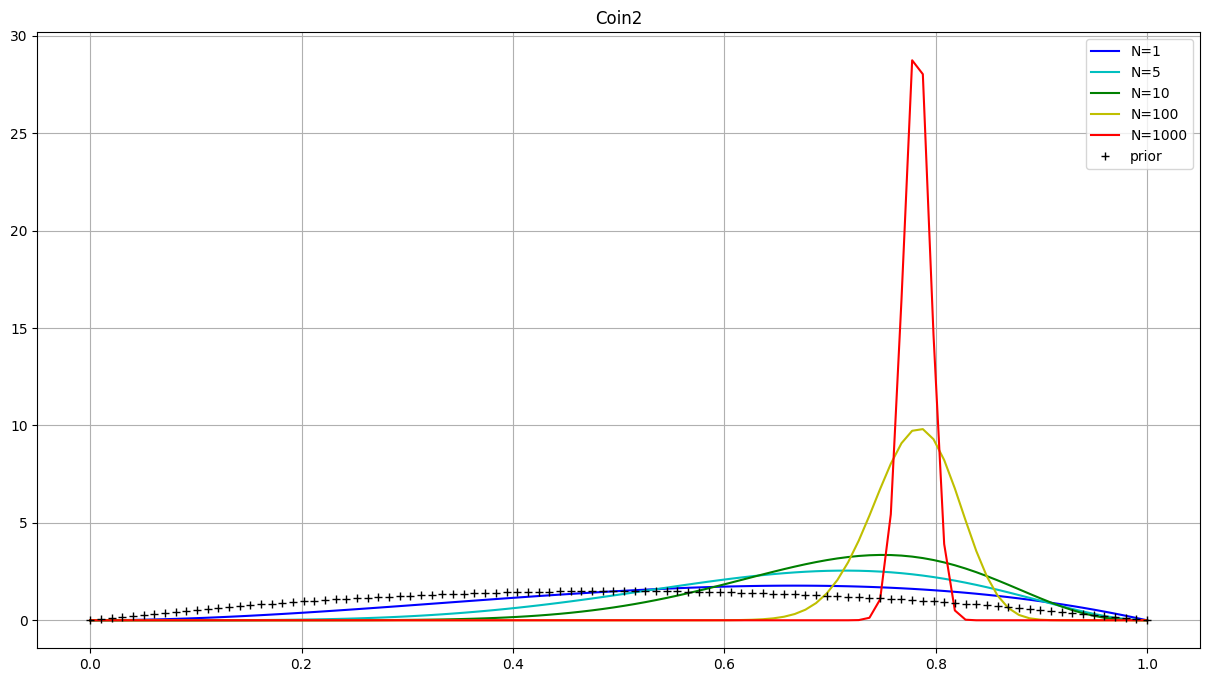

In [42]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 2
b = 2
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN1 = coin2(n)# TO COMPLETE
    gamma = yN1 + a # TO COMPLETE
    delta = b + n - yN1 # TO COMPLETE
    plt.plot(x, beta.pdf( x, gamma, delta ),color=cs[i], label="N="+str(n)) # TO COMPLETE
    
plt.plot(x, beta.pdf( x, a, b ),'k+', label='prior') # TO COMPLETE
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()

**Exercise:**
Repeat the previous exercise with a different set of prior parameter values ($\alpha$ and $\beta$). What
do you notice?

**Answer**:As N increase it tends to the same value as before. That's because as N tends to innfty it always tends to the MLE solution. (Thus the prior becomes less important as N increases.)


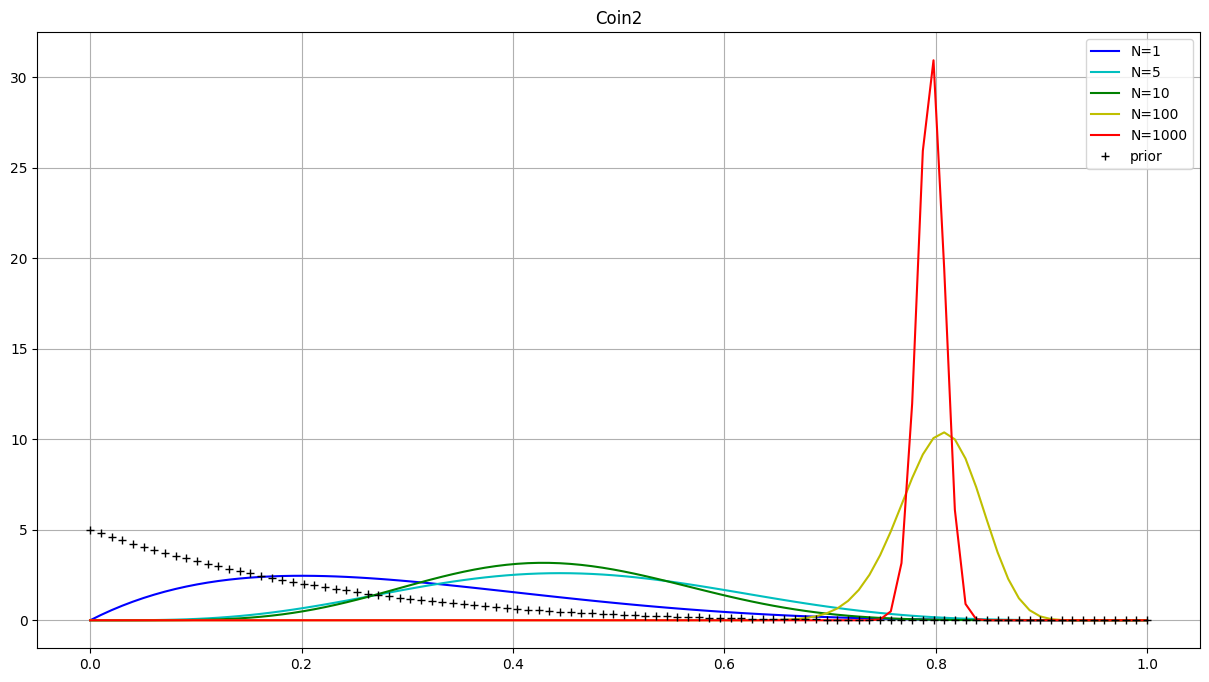

'\nTO COMPLETE\n'

In [43]:
N = [1, 5, 10, 100, 1000]
cs = ['b', 'c', 'g', 'y', 'r']
a = 1
b = 5

x = np.linspace(0, 1, 100)
plt.figure(figsize=(15,8))
for i,n in enumerate(N):
    # Compute the posterior distribution for coin2 given 'n' tosses 
    yN1 = coin2(n)# TO COMPLETE
    gamma = yN1 + a # TO COMPLETE
    delta = b + n - yN1 # TO COMPLETE
    plt.plot(x, beta.pdf( x, gamma, delta ),color=cs[i], label="N="+str(n)) # TO COMPLETE
    
plt.plot(x, beta.pdf( x, a, b ),'k+', label='prior') # TO COMPLETE
plt.title("Coin2")
plt.legend()
plt.grid()
plt.show()
"""
TO COMPLETE
"""

## Making predictions

`fairground()` is a coin game – you pay £1 to play. The stall owner tosses a coin ten times. If there are 6 or fewer heads, you win £2. The function returns 1 if you win and 0 if you lose.

**Exercise:** The probability that you win could be approximated by playing the game lots of times and computing the proportion of times you do win! By embedding fairground.m in a loop, approximate the probability that you will win in this way.


In [44]:
def fairground():
    return sum(np.random.random(10)<0.8) <= 6 # coin2

In [45]:
print("Approx Winning Probability:", sum([fairground() for i in range(10000)])/10000)

Approx Winning Probability: 0.1201



**Exercise:**  In the lectures, we derived an expression for the probability of getting $y_{new}$ heads in N tosses having observed $y_N$ heads in N tosses by taking an expectation with respect to the posterior.
Choose $\alpha$ and $\beta$ as you please (as long as you can justify your choice – do you know anything about this coin?). Use `coin2()` to generate $y_N$ for $N = 10$. Compute the posterior parameters. By using them, the expression from the lectures and the following identity, compute the probability that you will win given the coin tosses you have observed (i.e., you just need to add together a series of the expressions you derived in the lecture). 

Note that this quantity depends on the prior and the particular $y_N$ you get from `coin2()` and therefore could be quite different from the quantity computed in the previous question.
$$
P(y_{new}\le 6 \vert y_N, \alpha, \beta) = \sum_{a=0}^{6} P(y_{new}=a \vert y_N, \alpha, \beta)
$$


In [46]:

Nlook = 50 # the higher this number, the lower our winning probability
yN = coin2(Nlook)

# Assume the coin is unbiased -> so i use two particular values of alpha and beta to model my prior, so that it contains the information that the coin is unbiased
alpha1 = 5 # TO COMPLETE
beta1 = 5 # TO COMPLETE

gamma1 = yN + alpha1 # TO COMPLETE
delta1 = beta1 + Nlook - yN # TO COMPLETE

N = 10
p_ynew_se_six = 0 # smaller or equal to 6

for ynew in range(7):
    # Compute probability using formula given in slides
    numerator =  comb(N, ynew) * gamma_func(gamma1 + delta1) \
                * gamma_func(gamma1 + ynew) * gamma_func(delta1 + N - ynew)
    denominator = (gamma_func(gamma1)*gamma_func(delta1)*gamma_func(gamma1 + delta1 + N))
    
    p_ynew_se_six += numerator / denominator

print(p_ynew_se_six)

0.20100862209791387


In [47]:
Nlook = 50 # the higher this number, the lower the more accurate our winning probability
# yN = coin2(Nlook)

# Assume the coin is biased -> so I use two different values of alpha and beta to model my prior, so that it contains the information that the coin is biased.
# The values of alpha and beta reflect the fact that coin2 is biased towards heads
alpha1 = 5 # TO COMPLETE
beta1 = 2 # TO COMPLETE

gamma1 = yN + alpha1 # TO COMPLETE
delta1 = beta1 + Nlook - yN # TO COMPLETE

N = 10
p_ynew_se_six = 0 # smaller or equal to 6

for ynew in range(7):
    # Compute probability using formula given in slides
    numerator =  comb(N, ynew) * gamma_func(gamma1 + delta1) \
                * gamma_func(gamma1 + ynew) * gamma_func(delta1 + N - ynew)
    denominator = (gamma_func(gamma1)*gamma_func(delta1)*gamma_func(gamma1 + delta1 + N))
    
    p_ynew_se_six += numerator / denominator

print(p_ynew_se_six)

0.12548511224084027


**Answer**: we can see that in the second case, where we used a prior that matched the fact that the coin was biased, we obtain a more accurate estimate of the probability of winning the game. 